In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
from sklearn.model_selection import GridSearchCV
import utils as utils
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('text_entailment_dataset/train.csv')

# Shuffle the DataFrame
df = df.sample(frac=1, random_state=42)  # Shuffle with fixed seed for reproducibility

# Split the data into training and validation sets
train_df, validation_df = train_test_split(df, test_size=0.1, random_state=42)

# Write the training and validation DataFrames to separate CSV files
train_df.to_csv('text_entailment_dataset/train_data.csv', index=False)
validation_df.to_csv('text_entailment_dataset/validation_data.csv', index=False)


train_dataset = df = pd.read_csv('text_entailment_dataset/train_data.csv')
validation_dataset = df = pd.read_csv('text_entailment_dataset/validation_data.csv')
test_dataset = df = pd.read_csv('text_entailment_dataset/test_data.csv')


In [3]:
train_dataset.head()

,premise,hypothesis,label
0,a dog chases a red ball.,A cute dog paly with a ball.,0
1,A carefully dressed you boy is nonverbally com...,A young boy dressed in a potato sack is trying...,2
2,A black and white dog jumps in the snow.,The dogs are leaping into the snow.,0
3,A man singing and playing guitar on a busy sid...,A man is performing on a city sidewalk,0
4,A man holding a rifle next to his brown dog.,A man is climbing a tree.,2


In [4]:
train_dataset.shape

(494424, 3)

In [5]:
validation_dataset.head()

,premise,hypothesis,label
0,A young couple looking at different types and ...,a couple is looking,0
1,A man in a purple had climbs a rocky wall with...,A man is going to the temple.,2
2,A group of friends playing cards and trying to...,The people are playing a card game.,0
3,People looking at fish at an aquarium.,People looking at fish.,0
4,An older lady blowing out a 9 and a 0 number c...,A woman drinks coffee while driving.,2


In [6]:
validation_dataset.shape

(54937, 3)

In [7]:
test_dataset.head()

,premise,hypothesis
0,This church choir sings to the masses as they ...,The church has cracks in the ceiling.
1,This church choir sings to the masses as they ...,The church is filled with song.
2,This church choir sings to the masses as they ...,A choir singing at a baseball game.
3,"A woman with a green headscarf, blue shirt and...",The woman is young.
4,"A woman with a green headscarf, blue shirt and...",The woman is very happy.


In [8]:
test_dataset.shape

(9824, 2)

In [9]:
train_dataset[["premise"]] = train_dataset[["premise"]].astype(str)
train_dataset["premise"] = train_dataset["premise"].apply(utils.change_lower)
train_dataset["premise"] = train_dataset["premise"].apply(utils.clean_data)
train_dataset["premise"] = train_dataset["premise"].apply(utils.remover)

test_dataset[["hypothesis"]] = train_dataset[["hypothesis"]].astype(str)
train_dataset["hypothesis"] = train_dataset["hypothesis"].apply(utils.change_lower)
train_dataset["hypothesis"] = train_dataset["hypothesis"].apply(utils.clean_data)
train_dataset["hypothesis"] = train_dataset["hypothesis"].apply(utils.remover)

validation_dataset[["premise"]] = validation_dataset[["premise"]].astype(str)
validation_dataset["premise"] = validation_dataset["premise"].apply(utils.change_lower)
validation_dataset["premise"] = validation_dataset["premise"].apply(utils.clean_data)
validation_dataset["premise"] = validation_dataset["premise"].apply(utils.remover)

validation_dataset[["hypothesis"]] = validation_dataset[["hypothesis"]].astype(str)
validation_dataset["hypothesis"] = validation_dataset["hypothesis"].apply(utils.change_lower)
validation_dataset["hypothesis"] = validation_dataset["hypothesis"].apply(utils.clean_data)
validation_dataset["hypothesis"] = validation_dataset["hypothesis"].apply(utils.remover)

test_dataset[["premise"]] = test_dataset[["premise"]].astype(str)
test_dataset["premise"] = test_dataset["premise"].apply(utils.change_lower)
test_dataset["premise"] = test_dataset["premise"].apply(utils.clean_data)
test_dataset["premise"] = test_dataset["premise"].apply(utils.remover)

test_dataset[["hypothesis"]] = test_dataset[["hypothesis"]].astype(str)
test_dataset["hypothesis"] = test_dataset["hypothesis"].apply(utils.change_lower)
test_dataset["hypothesis"] = test_dataset["hypothesis"].apply(utils.clean_data)
test_dataset["hypothesis"] = test_dataset["hypothesis"].apply(utils.remover)

In [10]:
# Combine text data from training and validation datasets
text_data_train = train_dataset['premise'] + ' ' + train_dataset['hypothesis']
text_data_validation = validation_dataset['premise'] + ' ' + validation_dataset['hypothesis']

# Concatenate both training and validation text data
text_data_combined = pd.concat([text_data_train, text_data_validation], ignore_index=True)


In [11]:
vectorizer = CountVectorizer() # add max features ?
X = vectorizer.fit(text_data_combined)

In [63]:
X_train = vectorizer.fit_transform(text_data_train)
X_validation = vectorizer.transform(text_data_validation)

In [64]:
# Extract labels for train data
y_train = train_dataset['label']

# Extract labels for validation data
y_validation = validation_dataset['label']

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define hyperparameters for testing L1 and L2 regularization
hyperparameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1],
    'solver': ['liblinear', 'lbfgs']
}

# Initialize lists to store results
results = []

# Test both L1 and L2 regularization
for penalty in hyperparameters['penalty']:
    for C in hyperparameters['C']:
        for solver in hyperparameters['solver']:
            if solver == 'lbfgs' and penalty == 'l1':
                continue
            # Initialize logistic regression model with specified penalty and C
            logistic_model = LogisticRegression(penalty=penalty, C=C, solver=solver, max_iter=10000)

            # Train the model
            logistic_model.fit(X_train, y_train)

            # Predict on the validation set
            y_pred = logistic_model.predict(X_validation)

            # Evaluate accuracy
            accuracy = accuracy_score(y_validation, y_pred)

            # Store results
            results.append({
                'penalty': penalty,
                'C': C,
                'accuracy': accuracy,
                'solver': solver
            })

# Print results
for result in results:
    print("Penalty: {}, C: {}, Solver: {}, Accuracy: {:.4f}".format(result['penalty'], result['C'], result['solver'], result['accuracy']))

Penalty: l1, C: 0.1, Solver: liblinear, Accuracy: 0.5300
Penalty: l1, C: 1, Solver: liblinear, Accuracy: 0.5314
Penalty: l2, C: 0.1, Solver: liblinear, Accuracy: 0.5297
Penalty: l2, C: 0.1, Solver: lbfgs, Accuracy: 0.5288
Penalty: l2, C: 1, Solver: liblinear, Accuracy: 0.5237
Penalty: l2, C: 1, Solver: lbfgs, Accuracy: 0.5198


In [32]:
text_data_train[0]

'dog chases red ball cute dog paly ball'

In [36]:
text_data_train.shape

(494424,)

In [38]:
text_data_validation.shape

(54937,)

In [78]:
# Initialize lists to store metric values for each iteration
precision_values = []
recall_values = []
accuracy_values = []
f1_score_values = []

# Assuming you have your full dataset stored in X and y
# Splitting the data into train and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Initialize the logistic regression model
log_reg = LogisticRegression(penalty='l1', C=1, solver='liblinear')

best_f1_score = 0
best_model = None

# Assuming you have a loop for multiple iterations (e.g., epochs)
for i in range(10):  # num_iterations is the number of iterations in your loop
    # Incrementally increase the size of the training data
    train_size = int((i + 1) * 0.1 * X_train.shape[0])
    X_train_subset = X_train[:train_size]
    y_train_subset = y_train[:train_size]

    # Fit the model to the training data subset
    log_reg.fit(X_train_subset, y_train_subset)

    # Make predictions on the validation data
    y_pred = log_reg.predict(X_validation)

    # Calculate precision, recall, accuracy, and F1-score
    precision = precision_score(y_validation, y_pred, average='weighted')
    recall = recall_score(y_validation, y_pred, average='weighted')
    accuracy = accuracy_score(y_validation, y_pred)
    f1 = f1_score(y_validation, y_pred, average='weighted')

    # Append the calculated values to the lists
    precision_values.append(precision)
    recall_values.append(recall)
    accuracy_values.append(accuracy)
    f1_score_values.append(f1)

    # Check if the current model is the best based on F1-score
    if f1 > best_f1_score:
        best_f1_score = f1
        best_model = log_reg

# Save the best model
import joblib
joblib.dump(best_model, 'best_logistic_regression_model.pkl')


['best_logistic_regression_model.pkl']

In [71]:
X_train.shape

(400482, 34691)

In [75]:
print(precision)
print(recall)
print(accuracy)
print(f1)

0.5715093009049166
0.5679792254488252
0.5679792254488252
0.5654322349583105


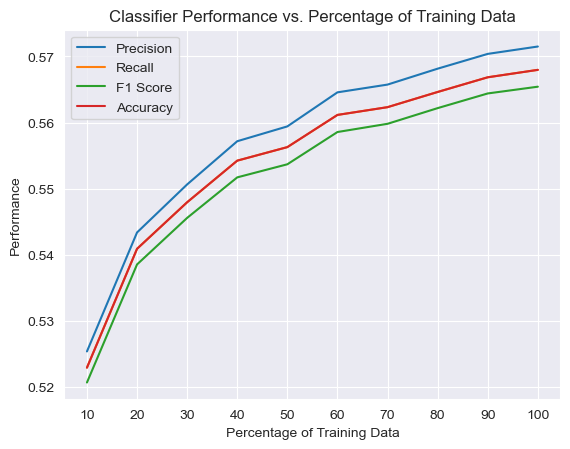

In [77]:
percents = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.plot(percents, precision_values, label='Precision')
plt.plot(percents, recall_values, label='Recall')
plt.plot(percents, f1_score_values, label='F1 Score')
plt.plot(percents, accuracy_values, label='Accuracy')

plt.xlabel('Percentage of Training Data')
plt.ylabel('Performance')
plt.title('Classifier Performance vs. Percentage of Training Data')
plt.xticks(percents)
plt.legend()

plt.savefig("linear_regression.jpg")
plt.show()